In [910]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import os
from itertools import chain, combinations
%matplotlib inline

# Dataframes
I collected distances by two ways. 
For example, in first way we search distance only ones, from Dwayne Johnson to Chris Hemsworth, but in second way we also search distance from Chris Hemsworth to Dwayne Johnson and if it less than previeous we change the distance.

In [936]:
#frist dataframe
df1 = pd.read_csv('data/matrix1.csv', index_col=0)
df1

,Dwayne\nJohnson,Chris\nHemsworth,Robert\nDowney\nJr,Akshay\nKumar,Jackie\nChan,Bradley\nCooper,Adam\nSandler,Scarlett\nJohansson,Sofia\nVergara,Chris\nEvans
Dwayne\nJohnson,0,2,2,0,3,0,3,2,0,2
Chris\nHemsworth,2,0,1,3,3,3,3,1,3,1
Robert\nDowney\nJr,2,1,0,0,0,0,3,1,3,1
Akshay\nKumar,0,3,0,0,0,0,0,0,0,0
Jackie\nChan,3,3,0,0,0,0,0,0,0,0
Bradley\nCooper,0,3,0,0,0,0,3,1,3,1
Adam\nSandler,3,3,3,0,0,3,0,2,3,3
Scarlett\nJohansson,2,1,1,0,0,1,2,0,0,1
Sofia\nVergara,0,3,3,0,0,3,3,0,0,2
Chris\nEvans,2,1,1,0,0,1,3,1,2,0


In [937]:
#second df
df2 = pd.read_csv('data/matrix2.csv', index_col=0)
df2

,Dwayne\nJohnson,Chris\nHemsworth,Robert\nDowney\nJr,Akshay\nKumar,Jackie\nChan,Bradley\nCooper,Adam\nSandler,Scarlett\nJohansson,Sofia\nVergara,Chris\nEvans
Dwayne\nJohnson,0,2,2,0,3,3,3,2,3,2
Chris\nHemsworth,2,0,1,3,3,1,3,1,2,1
Robert\nDowney\nJr,2,1,0,0,0,1,2,1,3,1
Akshay\nKumar,0,3,0,0,0,0,0,0,0,0
Jackie\nChan,3,3,0,0,0,0,0,0,3,0
Bradley\nCooper,3,1,1,0,0,0,3,1,2,1
Adam\nSandler,3,3,2,0,0,3,0,2,2,3
Scarlett\nJohansson,2,1,1,0,0,1,2,0,3,1
Sofia\nVergara,3,2,3,0,3,2,2,3,0,2
Chris\nEvans,2,1,1,0,0,1,3,1,2,0


# Draw Graphs

I ploted each possible graphs of both dataframes because not totaly understood the task :-)

In [952]:
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
def draw_graph(df, colors: list, accepted_dist: list):
    G  = nx.from_pandas_adjacency(df)
    plt.figure(figsize=(15, 10))
    plt.margins(0.1)
    p = nx.circular_layout(G)
    accepted = {(u,v):d['weight'] for (u,v,d) in G.edges(data=True) if d['weight'] in accepted_dist}
    edge_list = list(accepted.keys())
    color = [colors[i] for i in accepted.values()]
    nx.draw_networkx_nodes(G,pos=p, node_size=5000, node_color='orange')
    nx.draw_networkx_labels(G,pos=p, font_size=12)
    nx.draw_networkx_edges(G, pos=p, edgelist=edge_list, edge_color=color)
    nx.draw_networkx_edge_labels(G, pos=p, edge_labels=accepted)
    plt.title(f'Graph of a network. Accepted distances: {",".join(str(i) for i in accepted_dist)}')
    plt.show()

colors = {1: 'green', 2: 'orange', 3: 'blue'}
all_sets = [i for i in powerset([1, 2, 3])]

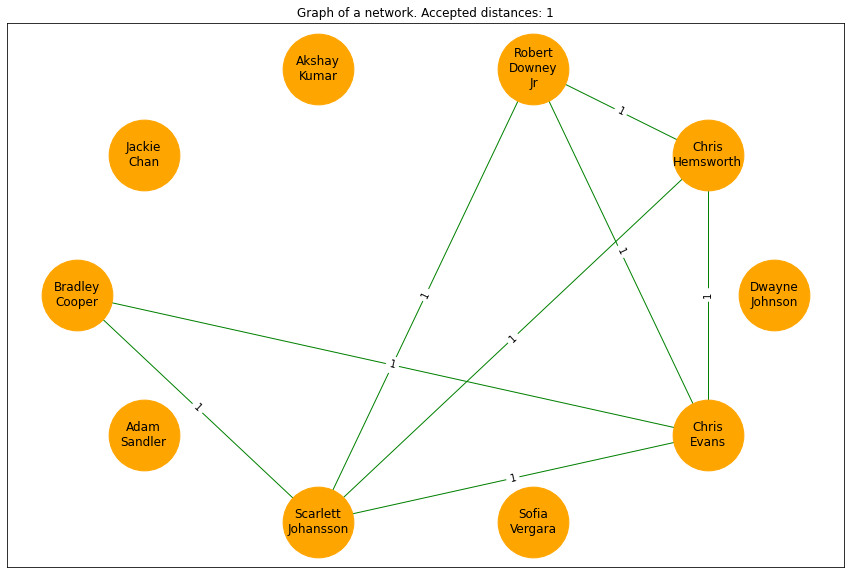

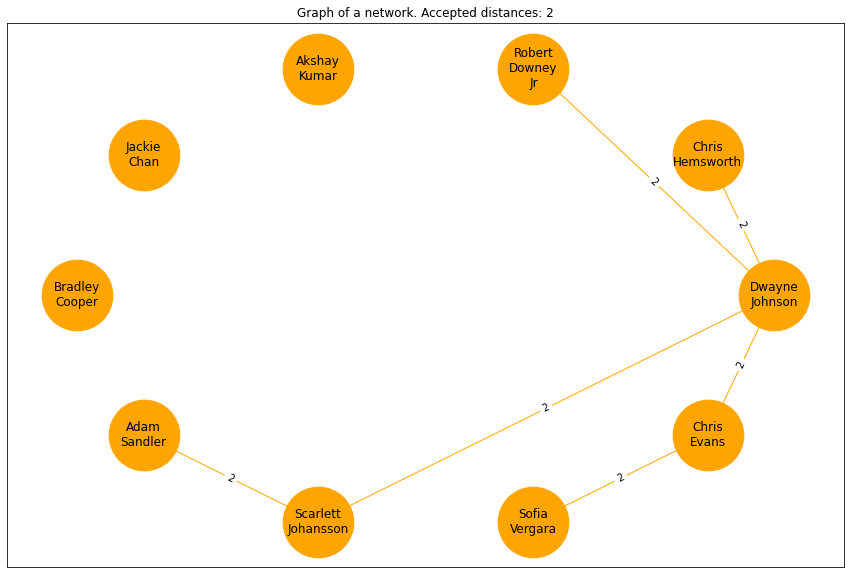

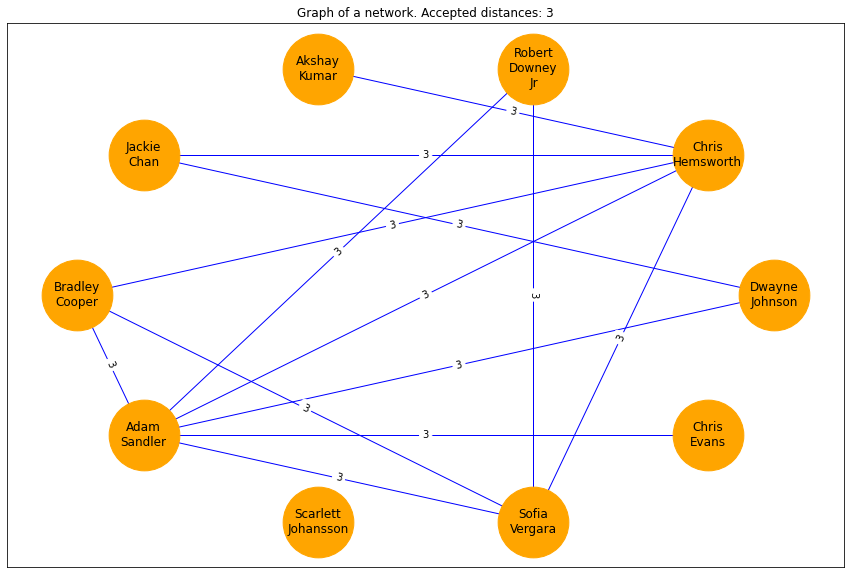

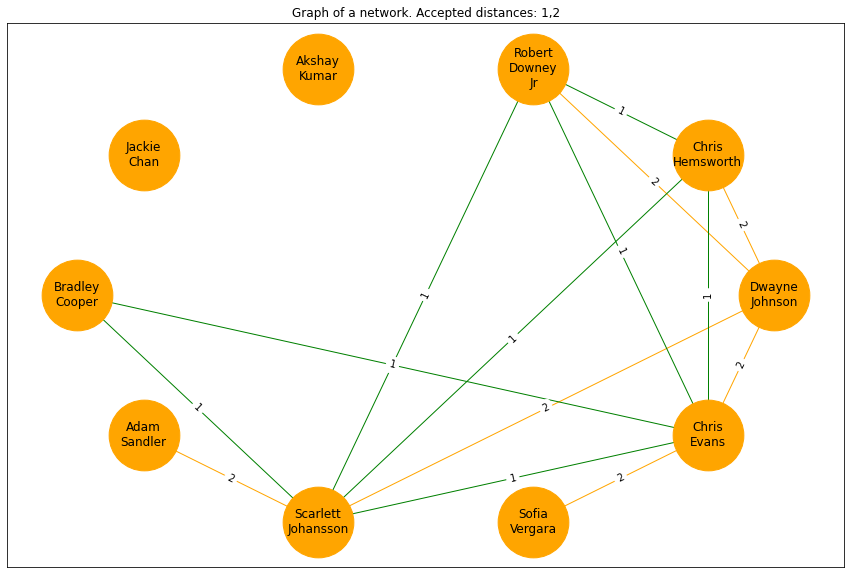

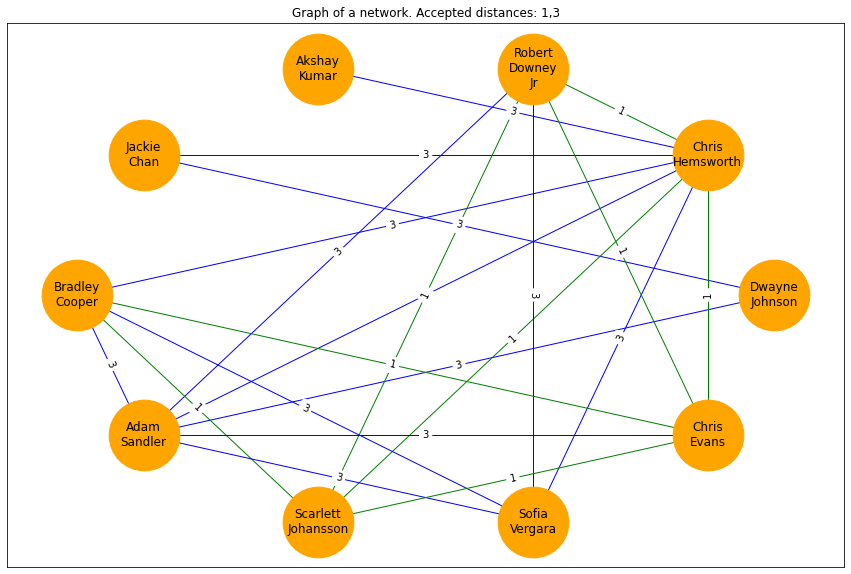

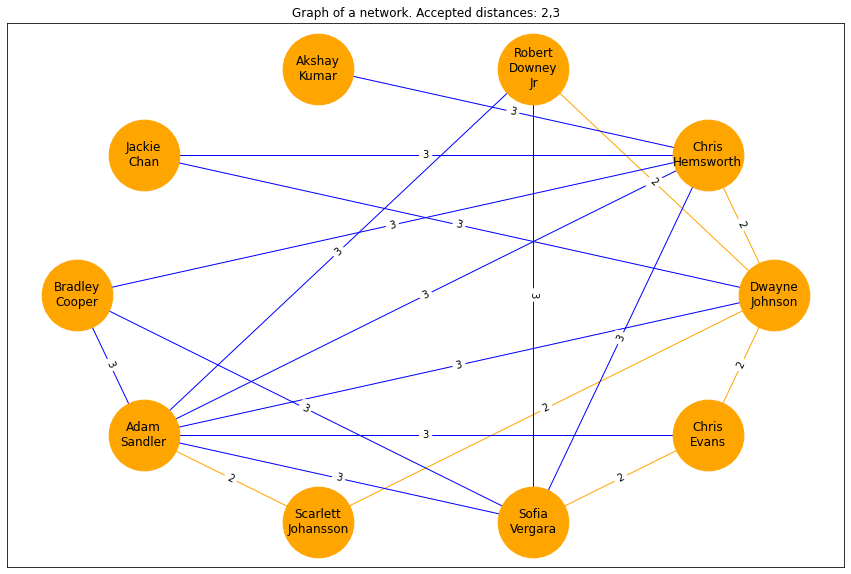

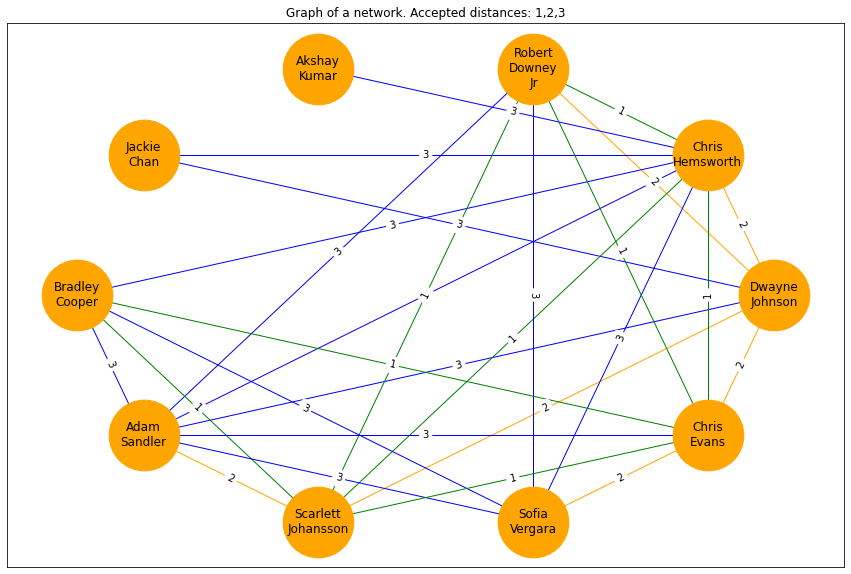

In [953]:
#first dataframe
for accepted_dist in all_sets:
    if accepted_dist:
        draw_graph(df1, colors=colors, accepted_dist=accepted_dist)

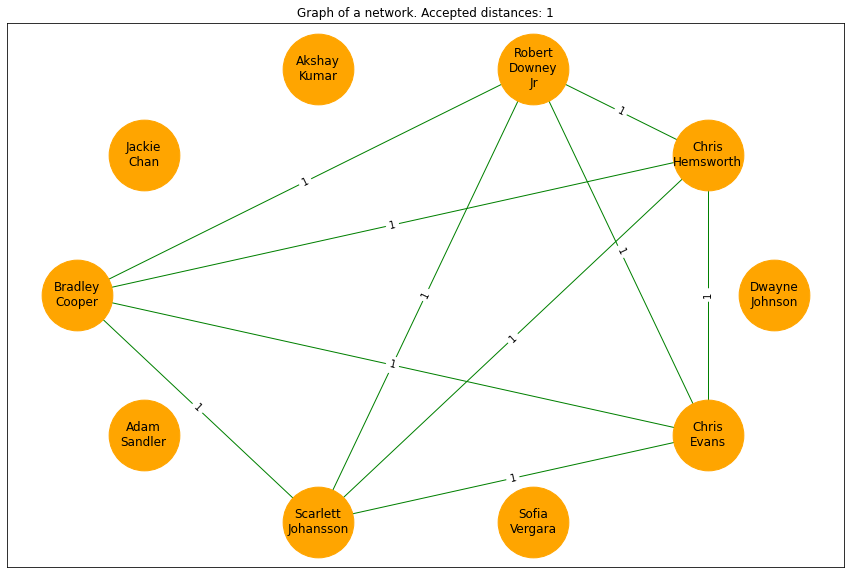

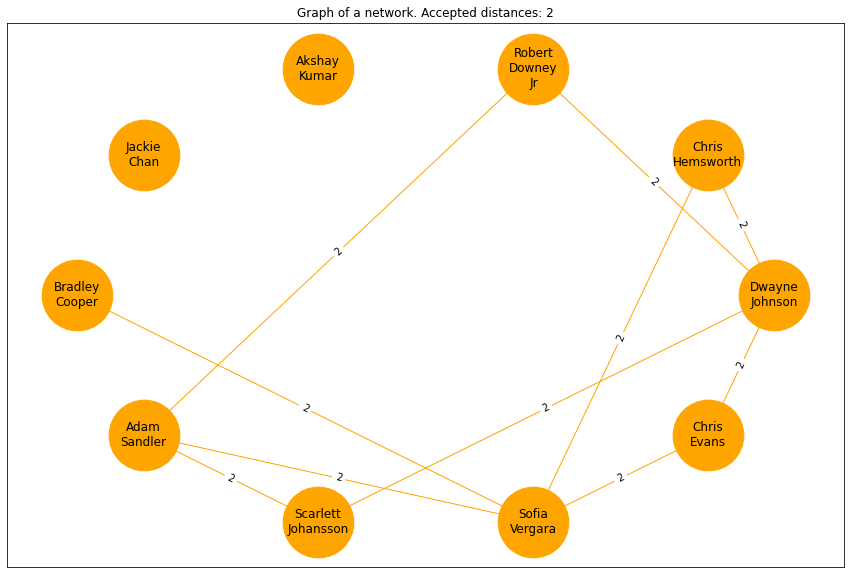

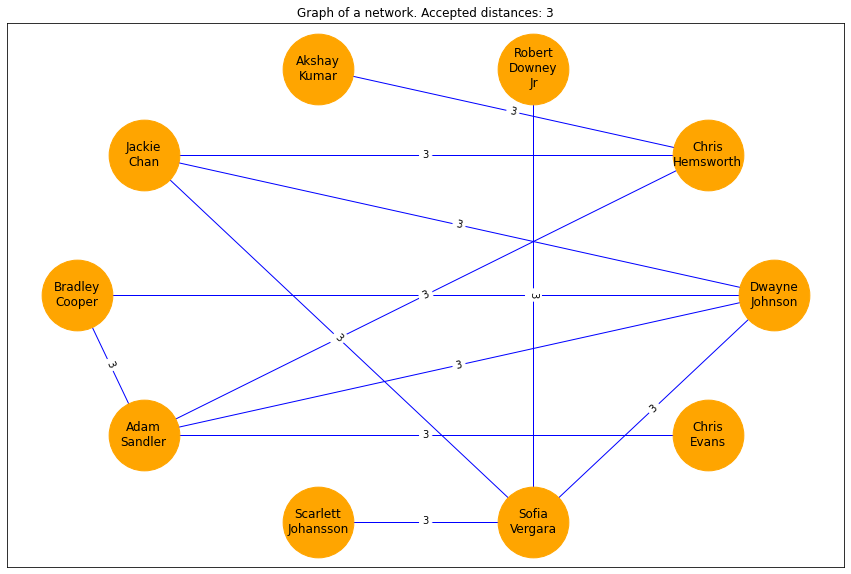

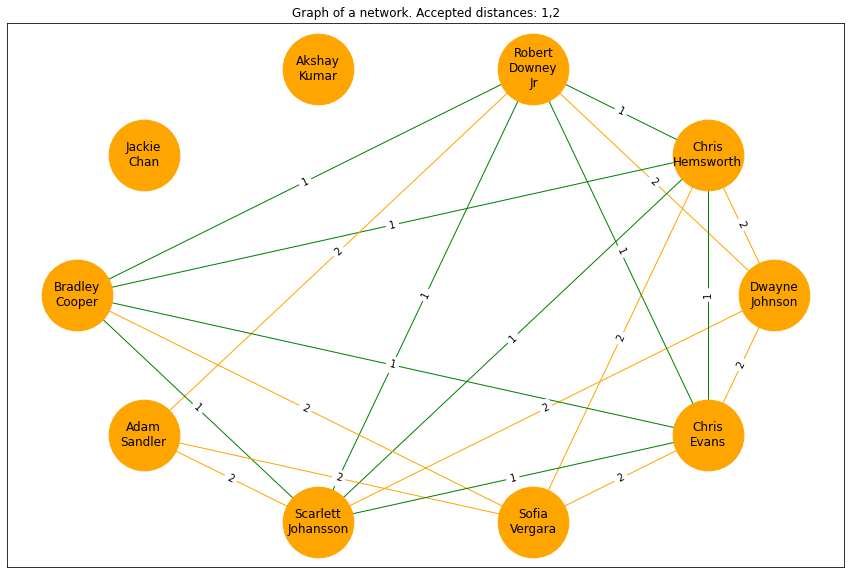

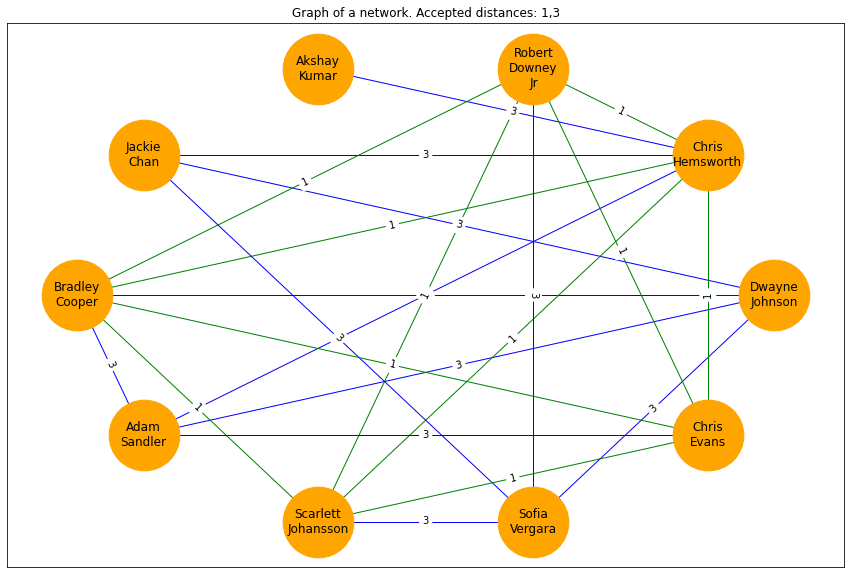

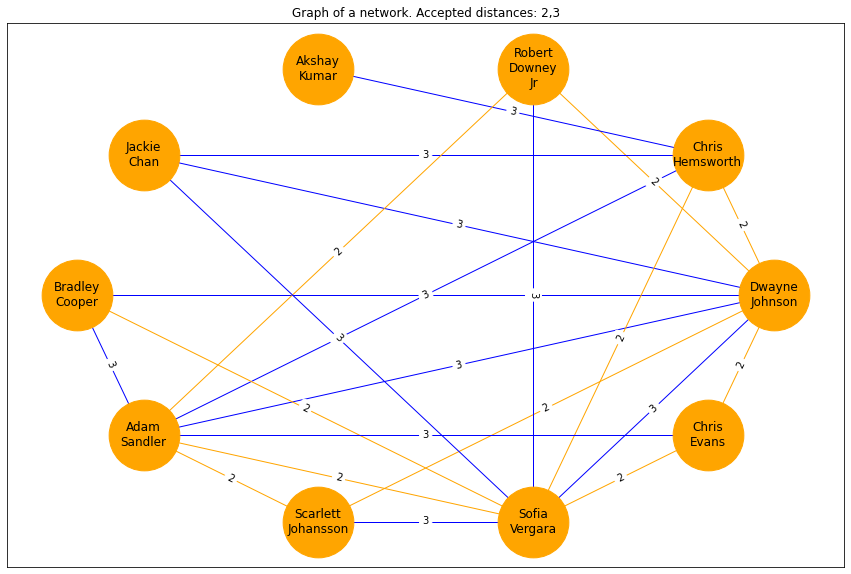

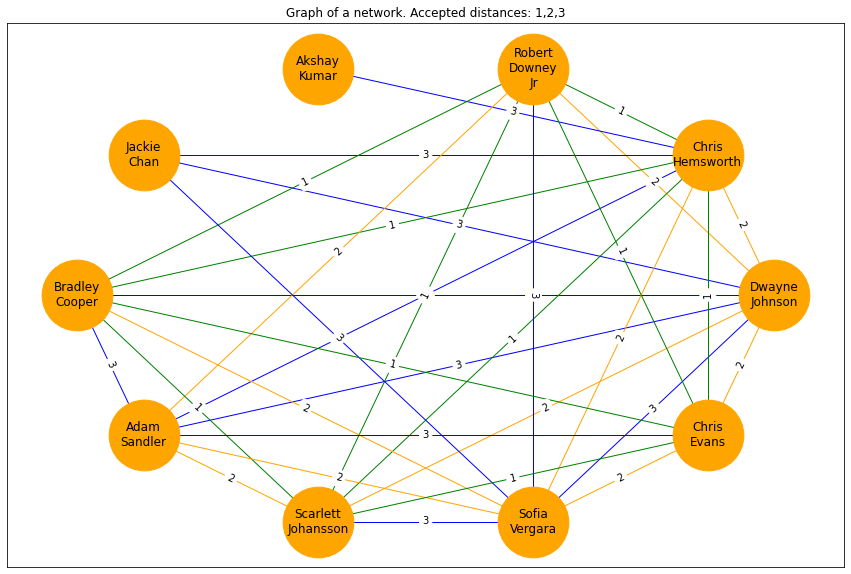

In [954]:
#second dataframe
for accepted_dist in all_sets:
    if accepted_dist:
        draw_graph(df2, colors=colors, accepted_dist=accepted_dist)

# Wordcloud

Here I think that we should collect description with constrains from week 10: 
* Not 'in production'
* Only full film
* Only where person is actor or actress



In [1031]:
files = os.listdir('data/')
files = [file for file in files if file.endswith('.txt')] 

In [1032]:
" ".join(files[0].split('.txt')[0].split('_'))

'Scarlett Johansson'

In [1033]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(files):
    fig, axes = plt.subplots(5, 2, figsize=(15, 20))
    plt.tight_layout()
    plt.subplots_adjust(top=1.1)
    for index, path in enumerate(files):
        with open(f'data/{path}', 'r') as f:
            text = f.readlines()
        title = " ".join(path.split('.txt')[0].split('_'))
        wordcloud = WordCloud(background_color="white",
                              stopwords=stopwords).generate(' '.join(text))
        axes.reshape(-1)[index].imshow(wordcloud, interpolation='bilinear')
        axes.reshape(-1)[index].set_title(title)
    plt.show()

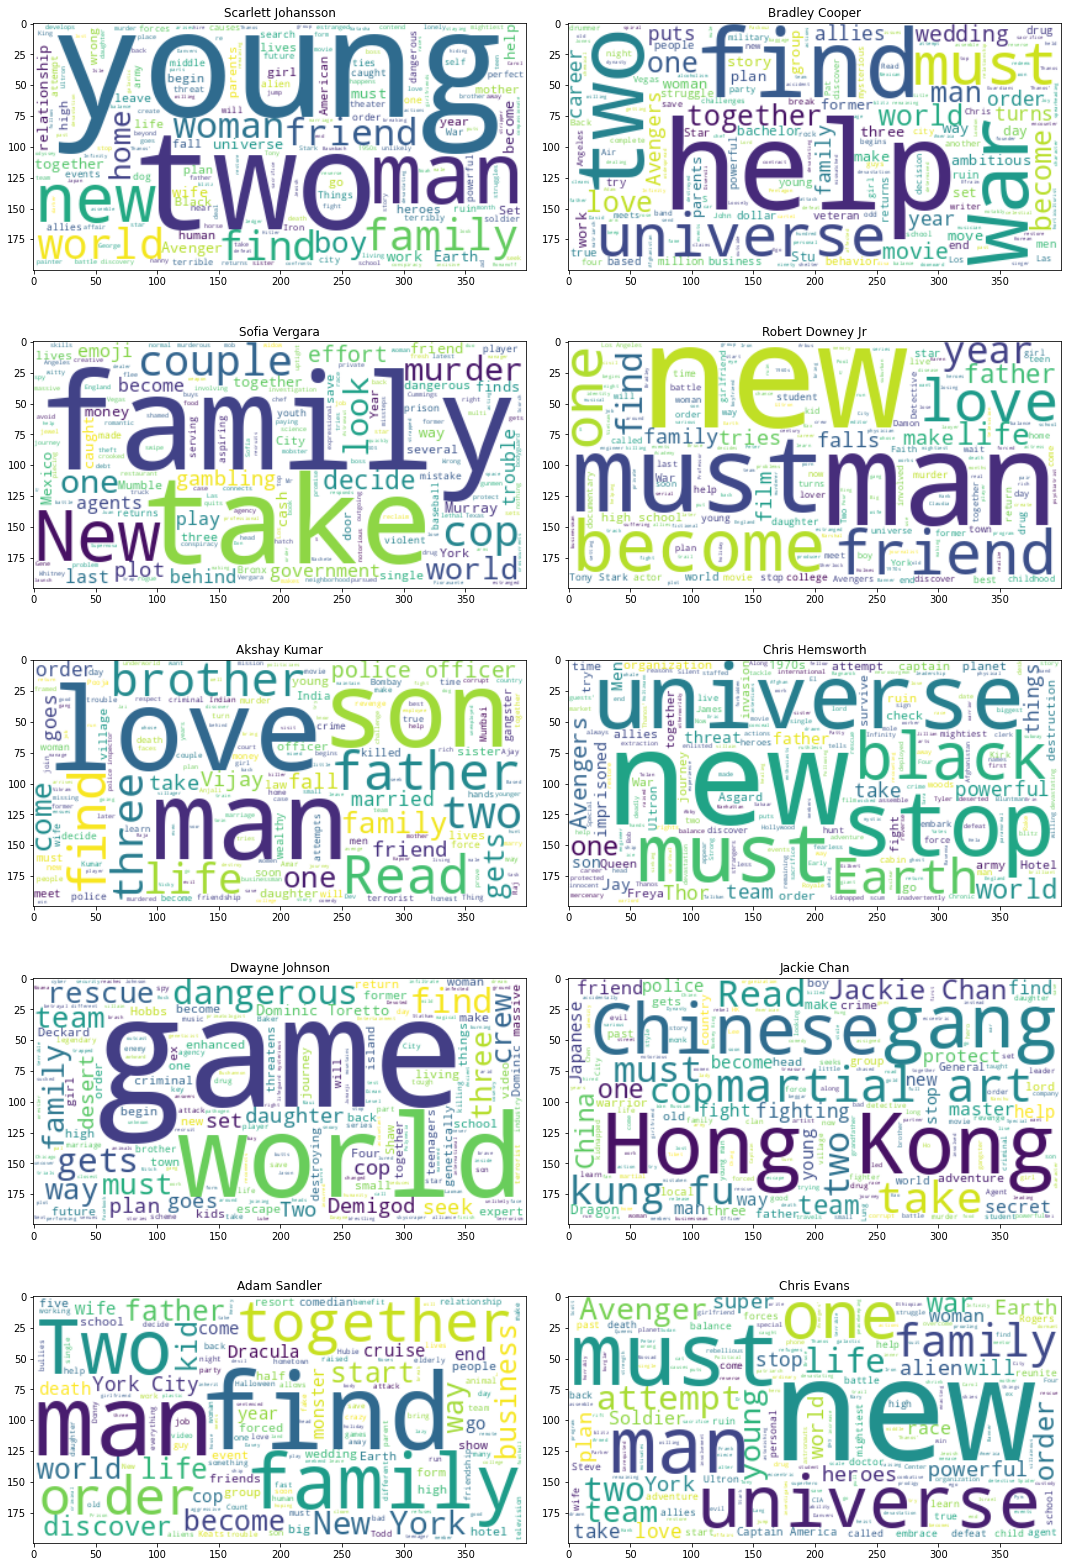

In [1034]:
show_wordcloud(files)

In [1035]:
with open('data/scarlett_johansson.txt', 'r') as file:
    t = file.readlines()

In [1038]:
print(t)

['Natasha Romanoff confronts the darker parts of her ledger when a dangerous conspiracy with ties to her past arises. A young boy in Hitler\'s army finds out his mother is hiding a Jewish girl in their home. Noah Baumbach\'s incisive and compassionate look at a marriage breaking up and a family staying together. After the devastating events of Avengers: Infinity War (2018), the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos\' actions and restore balance to the universe. Carol Danvers becomes one of the universe\'s most powerful heroes when Earth is caught in the middle of a galactic war between two alien races. The Avengers and their allies must be willing to sacrifice all in an attempt to defeat the powerful Thanos before his blitz of devastation and ruin puts an end to the universe. Set in Japan, Isle of Dogs follows a boy\'s odyssey in search of his lost dog. Things go terribly wrong for a group of girlfriends who 